In [36]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage
import yaml
from pyevtk.hl import imageToVTK 

# read parameters

In [37]:
with open("../base/parameters.yml") as file:
    parameters = yaml.load(file, Loader=yaml.FullLoader)
with open("../local/parameters.yml") as file:
    parameters_local = yaml.load(file, Loader=yaml.FullLoader)

# overwrite global parameters with local setting
for key in parameters_local:
    parameters[key] = parameters_local[key]
    
print(parameters)

{'data_folder': '/home/ebauman/Data/zebrafish_xenograft/', 'output_folder': '/home/ebauman/Data/zebrafish_xenograft/', 'key_file_name': 'Details_imaging_data_2D.xls', 'dimension': '2D', 'otsu_thresholding': False, 'sigma': 1, 'segmentation_method': 'ilastik', 'macrophages_small_objects': 2500}


# read ilastik segmentation

In [38]:
data_folder = parameters["data_folder"]
filename = data_folder + "04_Processed_Data/03_Ilastik/01_2D/03_Probability_Maps/200804_LBT070_5dpi_Pos006_C3_Probabilities.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    
    print(a_group_key)

    # Get the data
    #data = list(f[a_group_key])[1:10]
    data = np.array(f[a_group_key])
    print(data.shape)

Keys: <KeysViewHDF5 ['exported_data']>
exported_data
(10, 1024, 1024, 2)


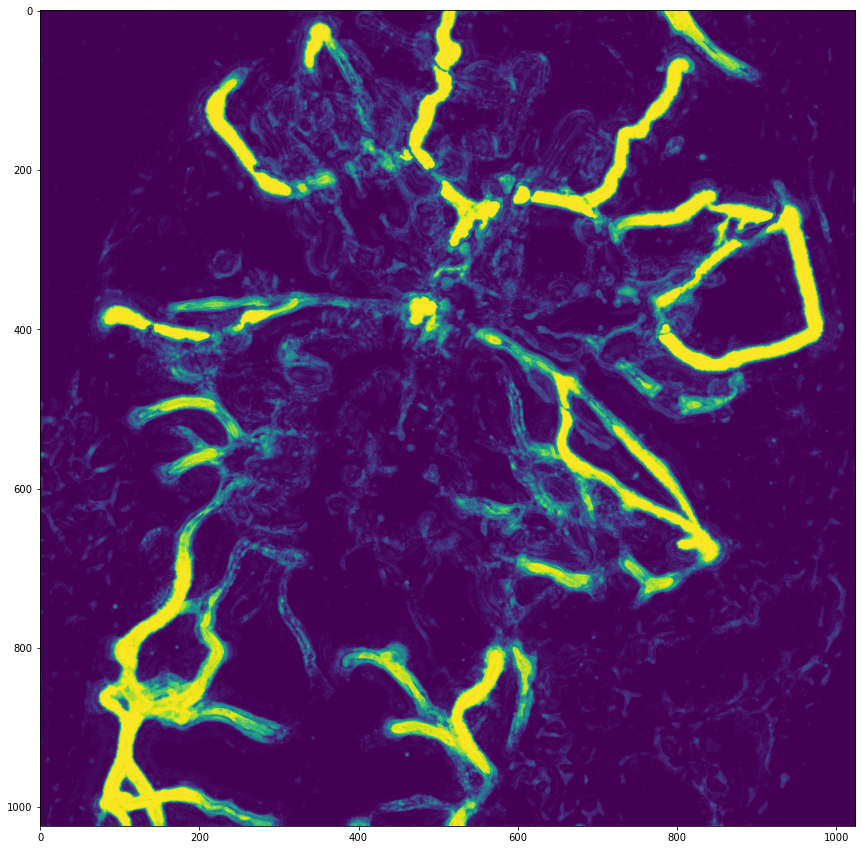

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(data[9,:,:,0])

In [40]:
vessel_data = data[:,:,:,0]
volume_percent = 100.0*len(vessel_data[vessel_data > 0.5])/len(vessel_data.flatten())
print("percentage of volume: %s" % volume_percent)

percentage of volume: 10.018129348754883


In [41]:
#vessel_mask = vessel_data[vessel_data > 0.5]
vessel_mask = np.where(vessel_data > 0.5, True, False)
vessel_mask.shape

#fig, ax = plt.subplots(figsize=(15,15))
#ax.imshow(vessel_mask[9,:,:])

(10, 1024, 1024)

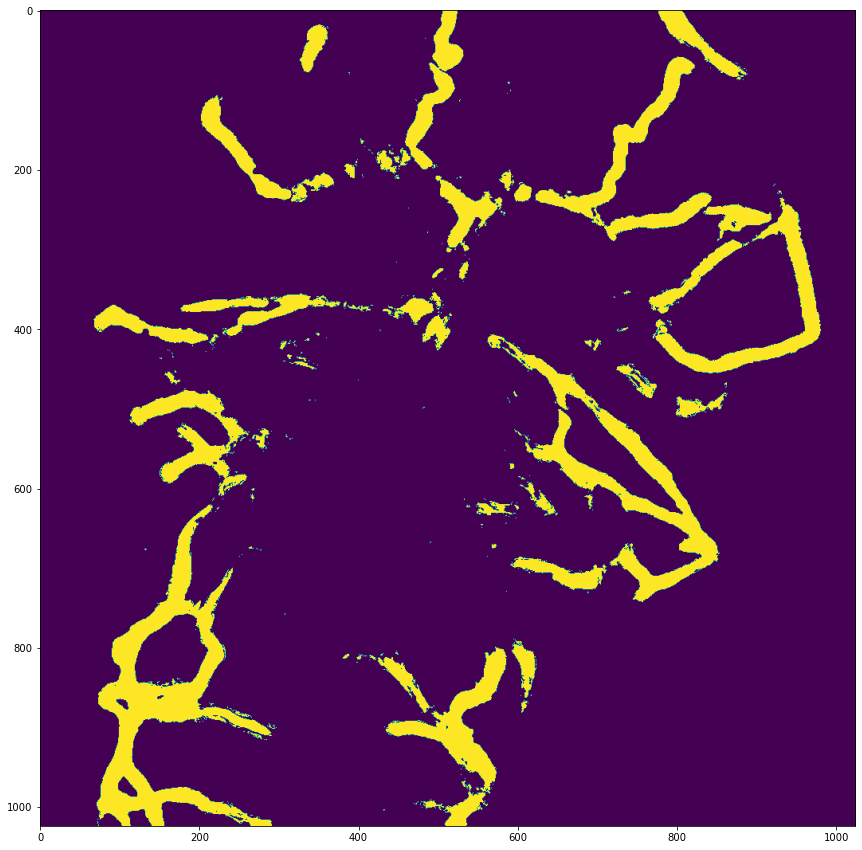

In [44]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(vessel_mask[5,:,:])

In [24]:
nx, ny, nz = vessel_data.shape[0], vessel_data.shape[1], vessel_data.shape[2]

ncells = nx * ny * nz
npoints = (nx + 1) * (ny + 1) * (nz + 1)
# Variables
vessel = np.random.rand(ncells).reshape( (nx, ny, nz), order = 'C')

#vessel = vessel_data.reshape( (nx, ny, nz), order = 'C')
for i in range(0,nx):
    print("done z %s" % i)
    for j in range(0,ny):
        for k in range(0,nz):
            vessel[i][j][k] = vessel_data[i][j][k]#vessel_data[i+50][j+500][k+500]


#temp = np.random.rand(npoints).reshape( (nx + 1, ny + 1, nz + 1)) <br>
#imageToVTK("./image", cellData = {"pressure" : 123, 1024, 1024123, 1024, 1024pressure}, pointData = {"temp" : temp} )
#imageToVTK("./vessel_image", cellData = {"vessel" : vessel})
vessel.shape

done z 0
done z 1
done z 2
done z 3
done z 4
done z 5
done z 6
done z 7
done z 8
done z 9


(10, 1024, 1024)

# Calculate distance transform

In [ ]:
vessel_distance = scipy.ndimage.morphology.distance_transform_edt(data[:,:,:,0])

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(vessel_distance[50,:,:])

In [ ]:
filename = "/home/fjodor/Data/Lise/Series-1-z-stack-macrophages_Probabilities.h5"


with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    
    print(a_group_key)

    # Get the data
    #data = list(f[a_group_key])[1:10]
    data = np.array(f[a_group_key])
    print(data.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(data[100,:,:,0])